In [1]:
from OU import * 
from utils import * 
from regression import * 

$$ \mathcal{L} = \frac{1}{N} \frac{1}{J} \sum_{n=1}^N \sum_{j=1}^J \left| X^{(n)}_{t_j} - \left \langle \boldsymbol{\ell}, \widehat{\mathbb{W}}_{t_j}^{\leq M} \right \rangle \right|^2 + \sum_{k=0}^M \sum_{{\color{navy}{\mathbf{v}}} \in V_k} \left( \beta_1 \left| \boldsymbol{\ell}^{\color{navy}\mathbf{i_1\ldots i_k}} \right| + \beta_2 \left( \boldsymbol{\ell}^{\color{navy}\mathbf{i_1\ldots i_k}} \right)^2 \right). $$

## I. Inverse CIR 

In [241]:
N = 30000
n = 252
T = 1
W, paths = generate_paths(N, n, T)
M = 4

In [243]:
x = 0.5 
kappa = 1
theta = 0.5 
eta = 1

X = simulate_inverse_CIR_euler(x, T, kappa, theta, eta, W)  

In [244]:
result = fit_ElasticNet_CV(X, paths, M, X_warm=X[:150], paths_warm=paths[:150], l1_ratio_grid=np.linspace(0.05, 1.0, 20), cv=5, n_jobs=-1, max_iter=50000, verbose=True)

Computing signatures: 100%|█████████████| 30000/30000 [00:08<00:00, 3587.27it/s]


PHASE 1: Warm-start with small dataset


Computing signatures: 100%|█████████████████| 150/150 [00:00<00:00, 3552.13it/s]


  Optimal hyperparameters found:
  alpha_star = 0.000167
  l1_ratio* = 1.000
  (Corresponds to beta_1=0.000167, beta_2=0.000000)
PHASE 2: Final fit on full dataset
  Model fitted successfully :
  Sparsity: 23/30 = 76.7% non-zero coefficients
The regression ends in  142.94372296333313  seconds.


In [247]:
result["coefficients"]

array([-0.14000913,  0.33286717,  0.        , -0.10652156, -0.29987907,
        0.3301579 ,  0.        , -0.01450915, -0.        ,  0.        ,
        0.        , -0.0608878 , -0.45657711,  0.42838929,  1.05462916,
       -0.        ,  0.        , -0.02185556,  0.35674581, -0.24856082,
       -0.33774508,  0.00431885,  0.67627953, -0.39227298, -0.20040906,
       -0.13521835,  0.13414172, -0.35801844, -0.6756749 ,  0.1870203 ])

In [249]:
x = 0.5 
kappa = 4
theta = 0.5 
eta = 2

X2 = simulate_inverse_CIR_euler(x, T, kappa, theta, eta, W)  

In [251]:
result2 = fit_ElasticNet_CV(X2, paths, M, X_warm=X2[:150], paths_warm=paths[:150], l1_ratio_grid=np.linspace(0.05, 1.0, 20), cv=5, n_jobs=-1, max_iter=50000, verbose=True)

Computing signatures: 100%|█████████████| 30000/30000 [00:08<00:00, 3544.23it/s]


PHASE 1: Warm-start with small dataset


Computing signatures: 100%|█████████████████| 150/150 [00:00<00:00, 3258.94it/s]


  Optimal hyperparameters found:
  alpha_star = 0.000163
  l1_ratio* = 1.000
  (Corresponds to beta_1=0.000163, beta_2=0.000000)
PHASE 2: Final fit on full dataset
  Model fitted successfully :
  Sparsity: 26/30 = 86.7% non-zero coefficients
The regression ends in  559.8959460258484  seconds.


In [254]:
result2["coefficients"]

array([-0.52487317,  0.66436578,  0.81622258, -0.41046128, -1.77636077,
        0.91934004,  0.        ,  0.        , -0.        , -0.03539962,
        2.5261453 , -1.5544301 , -3.3836255 ,  0.51758023, -1.68258895,
        0.84277052,  1.23258762, -0.28053128,  2.32365141, -0.04522896,
        0.1854158 ,  0.03592535, -0.        ,  1.32201381,  3.11632509,
       -0.37532796,  5.48418678, -0.73266209, -1.00701799,  0.0266929 ])

In [258]:
t_grid = np.linspace(0, T, n+1)
x, kappa, theta, eta = 0.5, 1, 0.5, 1 
X_true_1 = simulate_inverse_CIR_euler(x, T, kappa, theta, eta, W)
X_signature_1 = simulate_sigma(M, x, T, paths, result["coefficients"], verbose=True)

x, kappa, theta, eta = 0.5, 4, 0.5, 2 
X_true_2 = simulate_inverse_CIR_euler(x, T, kappa, theta, eta, W)
X_signature_2 = simulate_sigma(M, x, T, paths, result2["coefficients"], verbose=True)

Simulating: 100%|███████████████████████| 30000/30000 [00:11<00:00, 2647.84it/s]


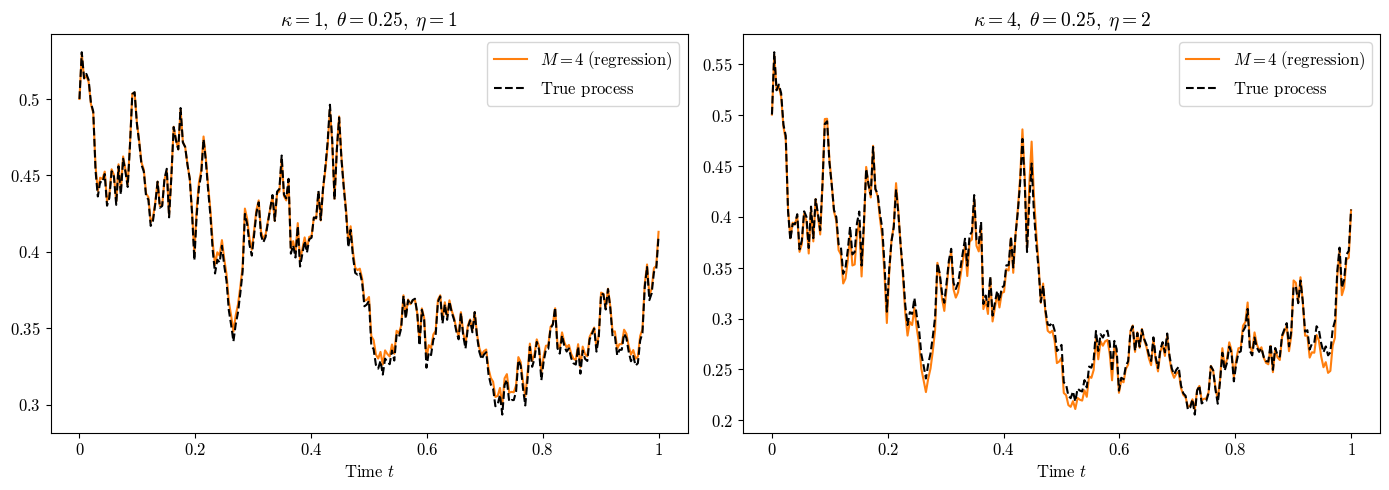

In [291]:
fig, ax = plt.subplots(1, 2, figsize=(7*2, 5))

i_test = 14268
ax[0].plot(t_grid, X_signature_1[i_test, :], color = "tab:orange", label = r"$M=4\;\text{(regression)}$")
ax[0].plot(t_grid, X_true_1[i_test, :], color = "black", linestyle = "--", label = r"$\text{True process}$")

ax[1].plot(t_grid, X_signature_2[i_test, :], color = "tab:orange", label = r"$M=4\;\text{(regression)}$")
ax[1].plot(t_grid, X_true_2[i_test, :], color = "black", linestyle = "--", label = r"$\text{True process}$")

ax[0].set_xlabel(r"$\text{Time }t$", fontsize=12)
ax[1].set_xlabel(r"$\text{Time }t$", fontsize=12)

ax[0].set_title(r"$\kappa = 1, \;\theta = 0.25, \;\eta = 1$", fontsize=14)
ax[1].set_title(r"$\kappa = 4, \;\theta = 0.25, \;\eta = 2$", fontsize=14)

for i in range(2) : 
    ax[i].xaxis.set_major_formatter(lambda x, _: f"${x:g}$")
    ax[i].yaxis.set_major_formatter(lambda y, _: f"${y:g}$")
    ax[i].legend(fontsize=12)
    ax[i].tick_params(axis='both', labelsize=12)
    

plt.tight_layout()
plt.show()

## II. Riemann Liouville fBM 

Multi-factor approximation:  
\begin{align*}
K(t) \approx \widetilde K(t) := \sum_{j=1}^{n_\text{fact}}\alpha_j e^{-\gamma_j t}, \qquad (\alpha_j, \gamma_j)_{j=1, \ldots, n_\text{fact}} \in (\mathbb{R}_+)^{2n_\text{fact}}.
\end{align*}
In this case, $K(t) \propto t^{H-\frac12}$, and 
\begin{align*}
X_t &= \int_0^t K(t-s)\, dW_s \approx \sum_{j=1}^{n_\text{fact}} \alpha_j X_t^j, \qquad X_t^j := \int_0^t e^{-\gamma_j(t-s)}\, dW_s.
\end{align*}
It is clear that for $j \in \{1,\ldots, n_\text{fact}\}$, the process $X^j$ is a semi-martingale defined as $dX_t^j = -\gamma_j X_t^j\, dt + dW_t$, $X^j_0 = 0$ (Ornstein-Uhlenbeck process). Once the coefficients $(\alpha_j, \gamma_j)_{j=1,\ldots,n_{\text{fact}}}$ are obtained, the process $X$ is simulated using an Euler–Maruyama scheme, in its so-called semi-implicit formulation. This choice is motivated by numerical stability considerations, in particular to avoid stiffness issues when the Hurst parameter $H$ is close to zero. In other words, we do not use the explicit scheme
\begin{align*}
X_{t_{i+1}}^j &= X_{t_{i}}^j - \gamma_j X_{t_i}^j\frac{T}{n} + (W_{t_{i+1}} - W_{t_i}) \\
X_{t_{i+1}} &= \sum_{j=1}^{n_\text{fact}} \alpha_j X_{t_{i+1}}^j
\end{align*} 
but rather the following semi-implicit scheme:
\begin{align*}
X_{t_{i+1}}^j &= \dfrac{1}{1+\gamma_j\frac{T}{n}}\left(X_{t_{i}}^j + (W_{t_{i+1}} - W_{t_i})\right) \\
X_{t_{i+1}} &= \sum_{j=1}^{n_\text{fact}} \alpha_j X_{t_{i+1}}^j
\end{align*} 

### II.1. Exact representation 

In [3]:
M_values = np.arange(1, 17) 
H_values = [0.1, 0.3]

N = 1
n = 252
T = 1
W, paths = generate_paths(N, n, T)
t_grid = np.linspace(0, T, n+1) 
n_factors = 20 

euler_traj = []
signatures_traj = []

for i, H in enumerate(tqdm(H_values)) :
    _, _, alpha_i, gamma_i = fit_K_frac(n_factors, H, T)
    euler_traj.append(simulate_fBM_multifactor(N, n, n_factors, T, alpha_i, gamma_i, W)[0])
    v = []
    for j, M in enumerate(M_values) : 
        v.append(simulate_shifted_fBM_signatures_time_dependent(M, H, 0, T, paths, verbose=False)[0])
    signatures_traj.append(v)

euler_traj = np.array(euler_traj)
signatures_traj = np.array(signatures_traj)

100%|█████████████████████████████████████████████| 2/2 [00:05<00:00,  2.60s/it]


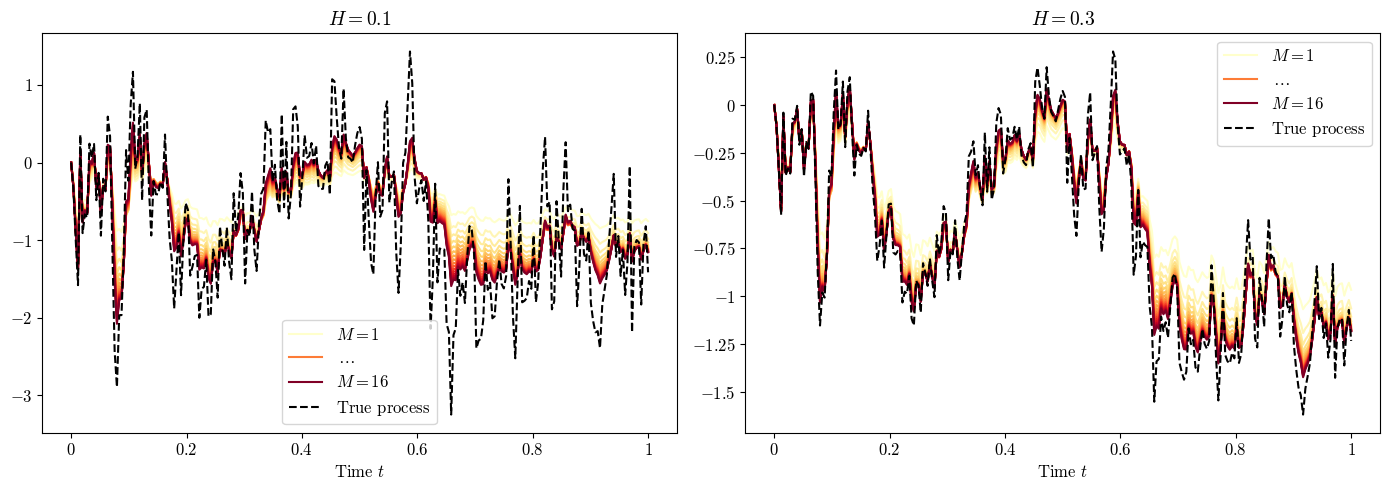

In [5]:
fig, ax = plt.subplots(1, 2, figsize = (7*2, 5))
ax = ax.flatten()

t_grid = np.linspace(0, T, n+1) 

cmap = plt.get_cmap("YlOrRd", len(M_values))
norm = mcolors.Normalize(vmin=M_values.min(), vmax=M_values.max())
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

for i, H in enumerate(H_values) :
    for j, M in enumerate(M_values) :
        color = cmap(norm(M))
        if j == 0 or j == len(M_values)-1 : 
            ax[i].plot(t_grid, signatures_traj[i][j], color = color, label = fr"$M = {M}$")
        elif j == len(M_values)//2 : 
            ax[i].plot(t_grid, signatures_traj[i][j], color = color, label = r"$\dots$")
        else : 
            ax[i].plot(t_grid, signatures_traj[i][j], color = color)
    
    ax[i].plot(t_grid, euler_traj[i], color = "black", linestyle ="--", label = r"$\text{True process}$")
    ax[i].legend(fontsize=12)
    

    ax[i].xaxis.set_major_formatter(lambda x, _: f"${x:g}$")
    ax[i].yaxis.set_major_formatter(lambda y, _: f"${y:g}$")
    ax[i].set_xlabel(r"$\text{Time }t$", fontsize=12)
    ax[i].set_title(fr"$H = {H}$", fontsize=14)
    ax[i].tick_params(axis='both', labelsize=12)

plt.tight_layout()
plt.show()

### II.2. Regression

In [7]:
M = 6
T = 1
H = 0.1
n_factors = 20
n = 252 
N = 1000
W, paths = generate_paths(N, n, T)

In [58]:
H = 0.1
_, _, alpha_i, gamma_i = fit_K_frac(n_factors, H, T)
X_multifactor_01 = simulate_fBM_multifactor(N, n, n_factors, T, alpha_i, gamma_i, W)

In [59]:
result_01 = fit_ElasticNet_CV(X_multifactor_01, paths, M, X_warm=X_multifactor_01[:50], paths_warm=paths[:50], l1_ratio_grid=[0.99], 
                           cv=2, n_jobs=-1, max_iter=50000, verbose=True)

Computing signatures: 100%|███████████████| 1000/1000 [00:00<00:00, 1909.15it/s]


PHASE 1: Warm-start with small dataset


Computing signatures: 100%|███████████████████| 50/50 [00:00<00:00, 2410.21it/s]


  Optimal hyperparameters found:
  alpha_star = 0.000977
  l1_ratio* = 0.990
  (Corresponds to beta_1=0.000968, beta_2=0.000010)
PHASE 2: Final fit on full dataset
  Model fitted successfully :
  Sparsity: 27/126 = 21.4% non-zero coefficients
The regression ends in  765.1029551029205  seconds.


In [62]:
result_01["coefficients"]

array([-0.00000000e+00,  2.97594058e+00, -0.00000000e+00,  2.32191562e+00,
       -8.90694989e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -2.92925391e+01,  0.00000000e+00,  1.95567550e+01,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -4.04434872e+01,  0.00000000e+00,  1.09015643e+02,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.01745968e-02, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -2.24699413e+01,  0.00000000e+00,  7.58990958e+02,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -8.85531903e+01,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  

In [9]:
H = 0.3 
_, _, alpha_i, gamma_i = fit_K_frac(n_factors, H, T)
X_multifactor_03 = simulate_fBM_multifactor(N, n, n_factors, T, alpha_i, gamma_i, W)

In [11]:
result_03 = fit_ElasticNet_CV(X_multifactor_03, paths, M, X_warm=X_multifactor_03[:50], paths_warm=paths[:50], l1_ratio_grid=[0.8, 0.9, 0.99], 
                           cv=2, n_jobs=-1, max_iter=50000, verbose=True)

Computing signatures: 100%|███████████████| 1000/1000 [00:00<00:00, 2293.52it/s]


PHASE 1: Warm-start with small dataset


Computing signatures: 100%|███████████████████| 50/50 [00:00<00:00, 2388.12it/s]


  Optimal hyperparameters found:
  alpha_star = 0.000835
  l1_ratio* = 0.990
  (Corresponds to beta_1=0.000827, beta_2=0.000008)
PHASE 2: Final fit on full dataset
  Model fitted successfully :
  Sparsity: 15/126 = 11.9% non-zero coefficients
The regression ends in  24.367900848388672  seconds.


In [17]:
result_03["coefficients"]

array([ 0.00000000e+00,  1.65747346e+00,  0.00000000e+00,  3.82315072e-01,
       -2.37054872e+00,  0.00000000e+00,  0.00000000e+00,  5.00648909e-01,
       -1.56816892e+00,  0.00000000e+00,  3.93294092e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -1.35995367e+01,  0.00000000e+00,  7.80963447e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -1.02305391e+01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [64]:
X_signature_01 = simulate_sigma(M, 0, T, paths, result_01["coefficients"], verbose=True)
X_signature_03 = simulate_sigma(M, 0, T, paths, result_03["coefficients"], verbose=True)

Simulating: 100%|█████████████████████████| 1000/1000 [00:00<00:00, 1849.61it/s]


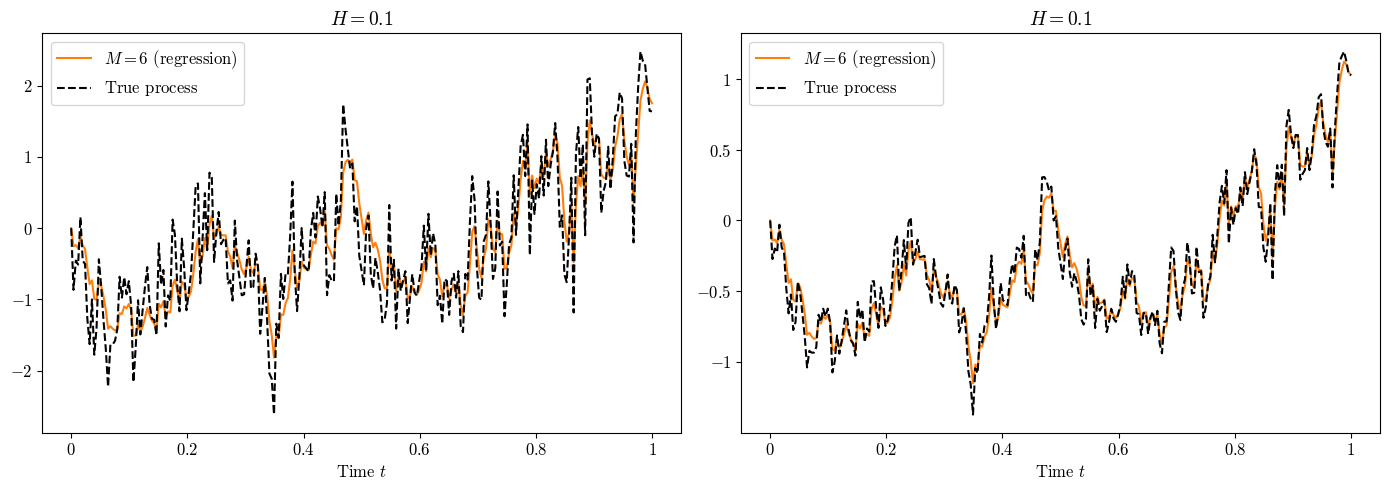

In [72]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

i_test = 215

ax[0].plot(t_grid, X_signature_01[i_test, :], color = "tab:orange", label = r"$M=6\text{ (regression)}$")
ax[0].plot(t_grid, X_multifactor_01[i_test, :], color = "black", linestyle ="--", label = r"$\text{True process}$")

ax[1].plot(t_grid, X_signature_03[i_test, :], color = "tab:orange", label = r"$M=6 \text{ (regression)}$")
ax[1].plot(t_grid, X_multifactor_03[i_test, :], color = "black", linestyle ="--", label = r"$\text{True process}$")

for i in range(2) :
    ax[i].xaxis.set_major_formatter(lambda x, _: f"${x:g}$")
    ax[i].yaxis.set_major_formatter(lambda y, _: f"${y:g}$")
    ax[i].set_xlabel(r"$\text{Time }t$", fontsize=12)
    ax[i].set_title(fr"$H = {H}$", fontsize=14)
    ax[i].tick_params(axis='both', labelsize=12)
    ax[i].legend(fontsize=12) 

plt.tight_layout()
plt.show() 

## III. OU 

In [10]:
x = 0.25 
kappa = 4
theta = 0.25
eta = 2 
T = 1
M = 4
N = 100000
n = 252 
W, paths = generate_paths(N, n, T)

In [11]:
X = simulate_OU_euler(x, T, kappa, theta, eta, W)

In [13]:
result = fit_ElasticNet_CV(X, paths, M, X_warm=X[:150], paths_warm=paths[:150], l1_ratio_grid=np.linspace(0.05, 1.0, 20), 
                           cv=5, n_jobs=-1, max_iter=50000, verbose=True)

Computing signatures: 100%|███████████| 100000/100000 [00:28<00:00, 3537.86it/s]


PHASE 1: Warm-start with small dataset


Computing signatures: 100%|█████████████████| 150/150 [00:00<00:00, 3499.51it/s]


  Optimal hyperparameters found:
  alpha_star = 0.000562
  l1_ratio* = 1.000
  (Corresponds to beta_1=0.000562, beta_2=0.000000)
PHASE 2: Final fit on full dataset
  Model fitted successfully :
  Sparsity: 6/30 = 20.0% non-zero coefficients
The regression ends in  872.8274869918823  seconds.


In [145]:
coeffs = result["coefficients"] 
coeffs

array([ 0.        ,  1.76360592,  0.        ,  0.24795147, -4.44084284,
        0.        ,  0.        ,  0.        , -2.63107561, -0.        ,
        5.60526775,  0.        , -0.        ,  0.        ,  0.        ,
       -0.        ,  0.        , -0.        ,  8.50077245,  0.        ,
        0.        , -0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        ,  0.        ,  0.        ])

In [138]:
N = 1
n = 252
T = 0.5
W, paths = generate_paths(N, n, T)
t_grid1 = np.linspace(0, T, n+1) 

X_true = simulate_OU_euler(x, T, kappa, theta, eta, W)
X_regression = simulate_sigma(M, x, T, paths, coeffs, verbose=True) 
X_signature = simulate_OU_signatures(M, x, kappa, theta, eta, paths, verbose=True)

Simulating OU: 100%|█████████████████████████████| 1/1 [00:00<00:00, 452.12it/s]


In [70]:
N = 1
n = 252
T = 2
W, paths = generate_paths(N, n, T)
t_grid2 = np.linspace(0, T, n+1) 

X_true2 = simulate_OU_euler(x, T, kappa, theta, eta, W)
X_regression2 = simulate_sigma(M, x, T, paths, coeffs, verbose=True) 
X_signature2 = simulate_OU_signatures(M, x, kappa, theta, eta, paths, verbose=True)

Simulating OU: 100%|█████████████████████████████| 1/1 [00:00<00:00, 412.05it/s]


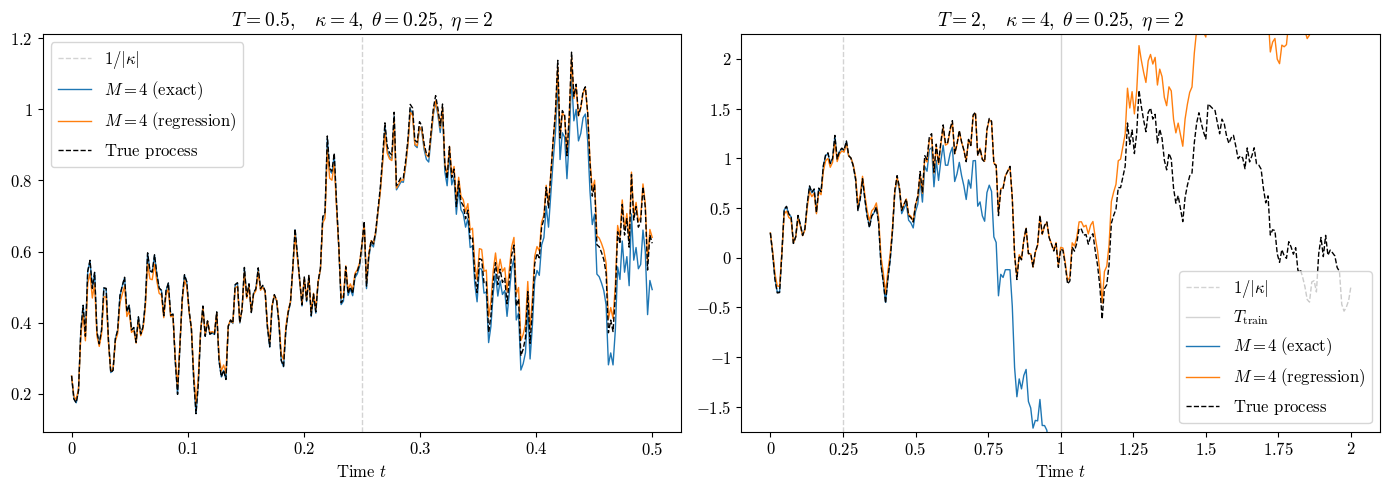

In [140]:
fig, ax = plt.subplots(1, 2, figsize=(7*2, 5))

ax[0].axvline(1/4, lw = 1, color = "lightgray", linestyle = "--", label = r"$1/|\kappa|$") 
ax[1].axvline(1/4, lw = 1, color = "lightgray", linestyle = "--", label = r"$1/|\kappa|$") 
ax[1].axvline(1, lw = 1, color = "lightgray", label = r"$T_\text{train}$")

ax[0].plot(t_grid1, X_signature[0], color = "tab:blue", lw=1, label = r"$M=4\;\text{(exact)}$")
ax[0].plot(t_grid1, X_regression[0], color = "tab:orange", lw=1, label = r"$M=4\;\text{(regression)}$")

ax[1].plot(t_grid2, X_signature2[0], color = "tab:blue", lw=1, label = r"$M=4\;\text{(exact)}$")
ax[1].plot(t_grid2, X_regression2[0], color = "tab:orange", lw=1, label = r"$M=4\;\text{(regression)}$")

ax[0].plot(t_grid1, X_true[0], color = "black", linestyle = "--", lw=1, label = r"$\text{True process}$")
ax[1].plot(t_grid2, X_true2[0], color = "black", linestyle = "--", lw=1, label = r"$\text{True process}$")

ax[0].set_xlabel(r"$\text{Time }t$", fontsize=12)
ax[1].set_xlabel(r"$\text{Time }t$", fontsize=12)

ax[0].set_title(r"$T = 0.5, \quad \kappa = 4, \;\theta = 0.25, \;\eta = 2$", fontsize=14)
ax[1].set_title(r"$T = 2, \quad \kappa = 4, \;\theta = 0.25, \;\eta = 2$", fontsize=14)

ax[1].set_ylim(x - 2, x + 2)

ax[0].xaxis.set_major_formatter(lambda x, _: f"${x:g}$")
ax[0].yaxis.set_major_formatter(lambda y, _: f"${y:g}$")
ax[0].legend(fontsize=12)
ax[0].tick_params(axis='both', labelsize=12)
ax[1].xaxis.set_major_formatter(lambda x, _: f"${x:g}$")
ax[1].yaxis.set_major_formatter(lambda y, _: f"${y:g}$")
ax[1].legend(fontsize=12)
ax[1].tick_params(axis='both', labelsize=12)

plt.tight_layout()
plt.show()